In [41]:
import pandas as pd
df=pd.read_csv("Data_Analyst_Assignment_Dataset.csv")
df


,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA
...,...,...,...,...,...,...,...,...
24577,899,Andhra Pradesh,8,0.00,Chittoor,FEMI,7192,EAX5C
24578,2699,Andhra Pradesh,8,0.00,Krishna,FEMI,21592,5MCE9
24579,1540,Andhra Pradesh,8,0.00,Krishna,FEMI,12320,9HO4Q
24580,824,Andhra Pradesh,8,0.00,Guntur,FEMI,6592,3VV72


In [42]:
df.isnull().sum()

Amount Pending      0
State               0
Tenure              0
Interest Rate       0
City                0
Bounce String       0
Disbursed Amount    0
Loan Number         0
dtype: int64

In [43]:
df.dtypes

Amount Pending        int64
State                object
Tenure                int64
Interest Rate       float64
City                 object
Bounce String        object
Disbursed Amount      int64
Loan Number          object
dtype: object

# Risk Label

In [44]:
#str: The label indicating the risk category of the borrower (Unknown Risk, Low Risk, Medium Risk, or High Risk).
def calculate_risk_label(bounce_string):
   

    if 'FEMI' in bounce_string:
        return "Unknown Risk"  # New customer
    elif bounce_string[-6:].count('B') == 0:
        return "Low Risk"  # No bounce in the last 6 months
    elif bounce_string[-6:].count('B') < 2 and bounce_string[-1] != 'B':
        return "Medium Risk"  # Bounced less than twice in last 6 months and not in the last month
    else:
        return "High Risk"  # Every other customer

# Apply the calculate_risk_label function to create the 'Risk' column
df['Risk Label'] = df['Bounce String'].apply(calculate_risk_label)




In [45]:
df["Risk Label"].value_counts()

Risk Label
Low Risk        14776
High Risk        4526
Unknown Risk     3222
Medium Risk      2058
Name: count, dtype: int64

# Tenure Label

In [46]:
def calculate_tenure_label(bounce_string, tenure):
    
    months_on_book = len(bounce_string)
    
    if months_on_book <= 3:
        return "Early Tenure"
    
    elif months_on_book >= (tenure - 3):
        return "Late Tenure"
    
    else:
        return "Mid Tenure"

# Let's create a new column 'Tenure Label' using the calculate_tenure_label function

df['Tenure Label'] = df.apply(lambda row: calculate_tenure_label(row['Bounce String'], row['Tenure']), axis=1)



In [47]:
df["Tenure Label"].value_counts()

Tenure Label
Early Tenure    12419
Mid Tenure       7588
Late Tenure      4575
Name: count, dtype: int64

# Ticket Size

In [48]:
df = df.sort_values(by='Amount Pending')
total_amount_pending = df['Amount Pending'].sum()
cohort_size = total_amount_pending / 3
cumulative_amount = 0
cohort_labels = []

for amount in df['Amount Pending']:
    if cumulative_amount + amount <= cohort_size:
        cumulative_amount += amount
        cohort_labels.append('Low ticket size')
    elif cumulative_amount + amount <= 2 * cohort_size:
        cumulative_amount += amount
        cohort_labels.append('Medium ticket size')
    else:
        cumulative_amount += amount
        cohort_labels.append('High ticket size')

# Adding 'Ticket Size' column to DataFrame
df['Ticket Size'] = cohort_labels


In [49]:
df["Ticket Size"].value_counts()

Ticket Size
Low ticket size       12296
Medium ticket size     7731
High ticket size       4555
Name: count, dtype: int64

In [50]:
print(df[df['Ticket Size'] == 'Low ticket size']['Amount Pending'].sum())
print(df[df['Ticket Size'] == 'Medium ticket size']['Amount Pending'].sum())
print(df[df['Ticket Size'] == 'High ticket size']['Amount Pending'].sum())


14676828
14676862
14676917


In [51]:
df

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Tenure Label,Ticket Size
1534,423,Maharashtra,11,11.84,Sangli,FEMI,4389,HEMS0,Unknown Risk,Mid Tenure,Low ticket size
1982,444,Tamil Nadu,11,12.23,VIRUDHUNAGAR,FEMI,4598,1BYJD,Unknown Risk,Mid Tenure,Low ticket size
889,451,Maharashtra,7,37.92,Pune,LSSSSB,2793,7COLC,High Risk,Late Tenure,Low ticket size
265,522,Karnataka,11,12.83,Bagalkot,FEMI,5390,587TX,Unknown Risk,Mid Tenure,Low ticket size
1486,522,Maharashtra,11,12.83,Pune,S,5390,5QJN0,Low Risk,Early Tenure,Low ticket size
...,...,...,...,...,...,...,...,...,...,...,...
9776,12500,Maharashtra,8,0.00,Kolhapur,LLSSSSS,100000,8MQRY,Low Risk,Late Tenure,High ticket size
13946,12500,Maharashtra,8,0.00,Pune,S,100000,1R840,Low Risk,Early Tenure,High ticket size
23089,12500,Kerala,8,0.00,MALAPPURAM,S,100000,QUV9D,Low Risk,Early Tenure,High ticket size
14009,12500,Maharashtra,8,0.00,Sangli,S,100000,66HA4,Low Risk,Early Tenure,High ticket size


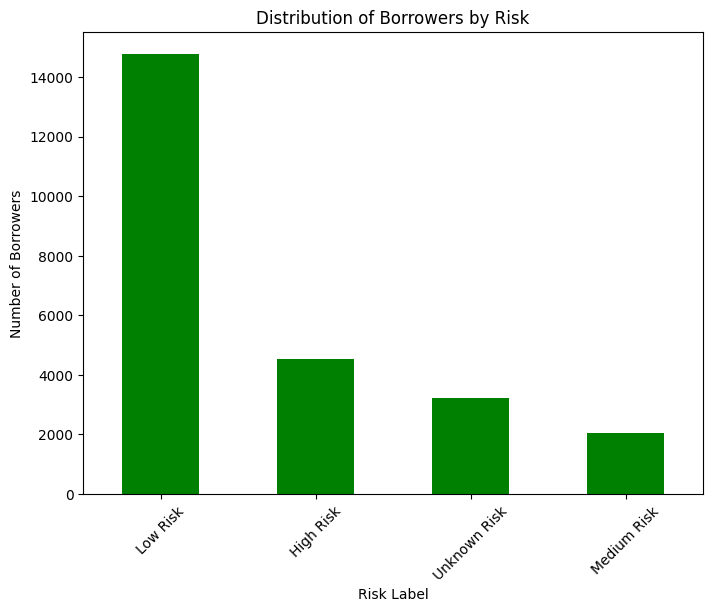

In [62]:
import matplotlib.pyplot as plt

# Count the number of borrowers in each risk category
risk_counts = df['Risk Label'].value_counts()

# Plot a bar chart for the risk distribution
plt.figure(figsize=(8, 6))
risk_counts.plot(kind='bar', color='green')
plt.title('Distribution of Borrowers by Risk')
plt.xlabel('Risk Label')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=45)
plt.show()


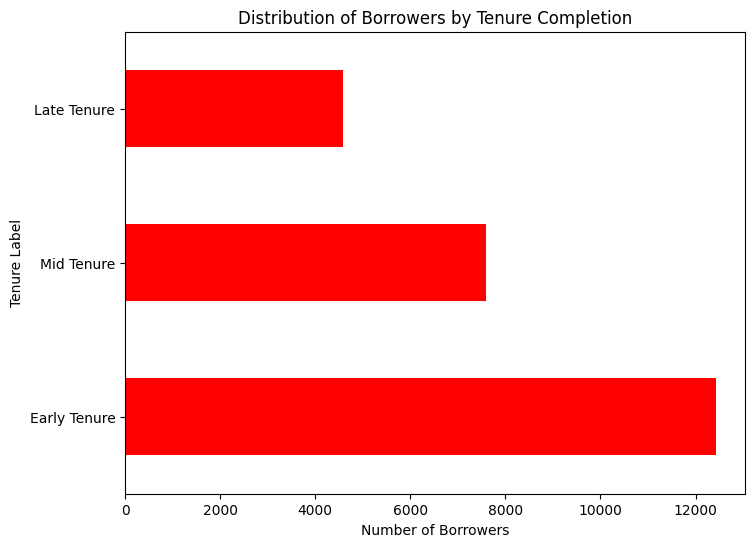

In [61]:
#Count the number of borrowers in each tenure label category
tenure_counts = df['Tenure Label'].value_counts()

# Plot a horizontal bar chart for the tenure completion distribution
plt.figure(figsize=(8, 6))
tenure_counts.plot(kind='barh', color='Red')
plt.title('Distribution of Borrowers by Tenure Completion')
plt.xlabel('Number of Borrowers')
plt.ylabel('Tenure Label')
plt.show()

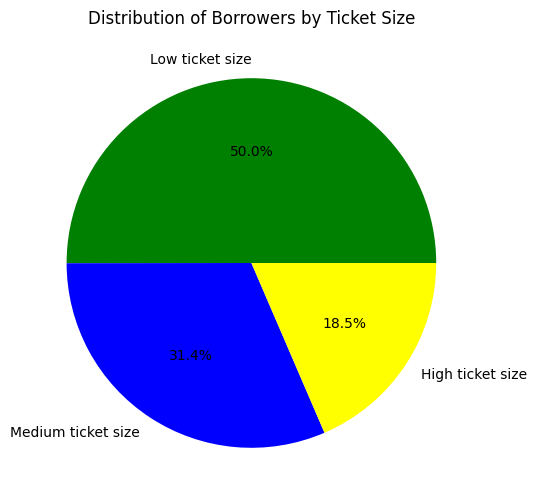

In [54]:
# Count the number of borrowers in each ticket size category
ticket_size_counts = df['Ticket Size'].value_counts()

# Plot a pie chart for the ticket size distribution
plt.figure(figsize=(8, 6))
ticket_size_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'blue', 'yellow'])
plt.title('Distribution of Borrowers by Ticket Size')
plt.ylabel('')
plt.show()


In [59]:
# Constants defining the cost of each channel
DIGITAL_COST = 5
VOICE_BOT_COST = 10
TELECALLING_COST = 50

# Function to calculate the cost for each channel
def calculate_channel_cost(df):
    digital_criteria = (df['Risk Label'] == 'Unknown Risk') | (df['Amount Pending'] < df['Amount Pending'].median())
    voice_bot_criteria = (df['City'].isin(['Mumbai', 'Pune', 'Delhi', 'Ahmedabad', 'Surat', 'Chennai', 'Kolkata', 'Bangalore', 'Hyderabad'])) & \
                         ((df['Risk Label'] == 'Low Risk') | (df['Ticket Size'] != 'High ticket size'))
    
    digital_cost = DIGITAL_COST * digital_criteria.sum()
    voice_bot_cost = VOICE_BOT_COST * voice_bot_criteria.sum()
    telecalling_cost = TELECALLING_COST * len(df)
    
    return digital_cost, voice_bot_cost, telecalling_cost

# Sample DataFrame 'df' containing loan data
# Assuming 'Risk Label', 'Tenure Label', 'Ticket Size' columns are already created
# Adjust the DataFrame name and column names according to your actual DataFrame structure

# Calculate the cost for each channel
digital_cost, voice_bot_cost, telecalling_cost = calculate_channel_cost(df)

# Output the channel with the lowest total cost
min_cost_channel = min(digital_cost, voice_bot_cost, telecalling_cost)

# Output the channel with its total cost
if min_cost_channel == digital_cost:
    print(f"Recommendation: Spend on Digital channel with total cost {digital_cost} rupees.")
elif min_cost_channel == voice_bot_cost:
    print(f"Recommendation: Spend on Voice bot channel with total cost {voice_bot_cost} rupees.")
else:
    print(f"Recommendation: Spend on Telecalling channel with total cost {telecalling_cost} rupees.")

print(f"Spend on Digital channel with total cost : {digital_cost} rupees.")  
print(f"Spend on Voice bot channel with total cost : {voice_bot_cost} rupees.")
print(f"Spend on Telecalling channel with total cost : {telecalling_cost} rupees.")



Recommendation: Spend on Voice bot channel with total cost 35600 rupees.
Spend on Digital channel with total cost : 68835 rupees.
Spend on Voice bot channel with total cost : 35600 rupees.
Spend on Telecalling channel with total cost : 1229100 rupees.


In [60]:
df.to_excel('loan_data.xlsx', index=False)   